# Clustering

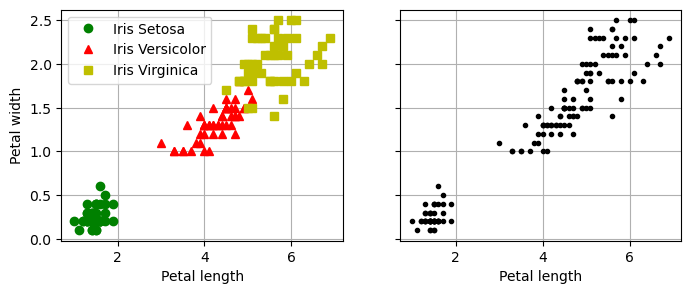

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris=load_iris()
X=iris.data
y=iris.target

plt.figure(figsize=(8,3))
plt.subplot(121)
plt.plot(X[y==0,2],X[y==0,3],"go",label="Iris Setosa")
plt.plot(X[y==1,2],X[y==1,3],"r^",label="Iris Versicolor")
plt.plot(X[y==2,2],X[y==2,3],"ys",label="Iris Virginica")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(X[:,2],X[:,3],"k.")
plt.xlabel("Petal length")
plt.tick_params(labelleft=False)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

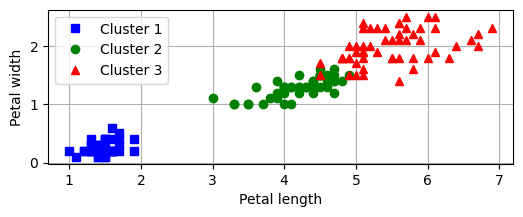

In [4]:
from sklearn.mixture import GaussianMixture
from scipy import stats
import numpy as np

y_pred=GaussianMixture(n_components=3,random_state=42).fit(X).predict(X)

mapping={}

for class_id in np.unique(y):
    mode,_=stats.mode(y_pred[y==class_id])
    mapping[mode]=class_id

y_pred=np.array([mapping[cluster_id] for cluster_id in y_pred])

plt.figure(figsize=(6,2))

plt.plot(X[y_pred==0,2],X[y_pred==0,3],"bs",label="Cluster 1")
plt.plot(X[y_pred==1,2],X[y_pred==1,3],"go",label="Cluster 2")
plt.plot(X[y_pred==2,2],X[y_pred==2,3],"r^",label="Cluster 3")
plt.grid()
plt.legend()
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()



In [5]:

(y_pred==y).sum()/len(y_pred)

0.9666666666666667

In [6]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

blob_centers=np.array([[0.5,1.7],[-0.5,2.6],[-2.4,1.9],[-2.8,2.8],[-1.2,2.3]])
blob_std=np.array([0.4,0.2,0.2,0.1,0.1])
X,y=make_blobs(n_samples=2000,centers=blob_centers,cluster_std=blob_std,random_state=8)
k=5
kmeans=KMeans(n_clusters=k,random_state=42)
y_pred=kmeans.fit_predict(X)

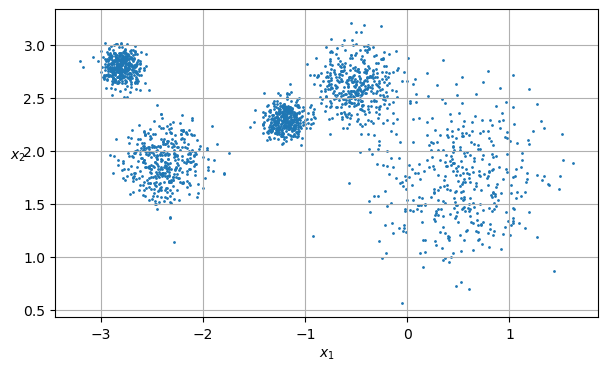

In [7]:


def plot_clusters(X,y=None):
    plt.scatter(X[:,0],X[:,1],s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$",rotation=0)

plt.figure(figsize=(7,4))
plot_clusters(X)
plt.grid()

In [8]:
y_pred

array([4, 2, 1, ..., 1, 3, 4], dtype=int32)

In [9]:
kmeans.labels_


array([4, 2, 1, ..., 1, 3, 4], dtype=int32)

In [10]:
kmeans.labels_ is y_pred

True

In [11]:
kmeans.cluster_centers_

array([[ 0.55649348,  1.69251263],
       [-2.3870964 ,  1.89135143],
       [-1.18787608,  2.29182972],
       [-2.80250024,  2.79039767],
       [-0.46640576,  2.60391412]])

In [12]:
X_new=np.array([[0.4,2],[-0.3,2.2]])

In [13]:
kmeans.predict(X_new)

array([0, 4], dtype=int32)

### Decision Boundaries

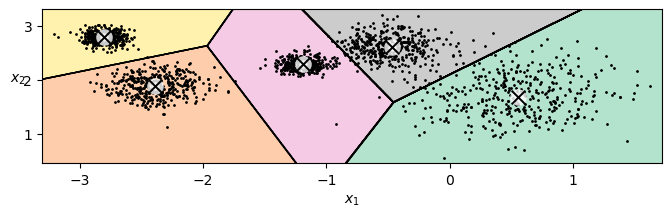

In [15]:
def plot_data(X):
    plt.plot(X[:,0],X[:,1],"k.",markersize=2)
    
def plot_centroids(centroids,weights=None,circle_color="w",cross_color="k"):
    if weights is not None:
        centroids=centroids[weights>weights.max()/10]
    plt.scatter(centroids[:,0],centroids[:,1],
               marker="o",
               s=35,
               linewidths=6,
               color=circle_color,
               zorder=10,
               alpha=0.8)
    plt.scatter(centroids[:,0],centroids[:,1],
               marker="x",
               s=1,
               linewidths=14,
               color=cross_color,
               zorder=11,
               alpha=1)
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 2))
plot_decision_boundaries(kmeans, X)


    

### Hard Clustering vs Soft Clustering

In [17]:
kmeans.transform(X_new).round(2)

array([[0.35, 2.79, 1.61, 3.3 , 1.06],
       [1.  , 2.11, 0.89, 2.57, 0.44]])

In [18]:
np.linalg.norm(np.tile(X_new,(1,k)).reshape(-1,k,2)-kmeans.cluster_centers_,axis=2).round(2)

array([[0.35, 2.79, 1.61, 3.3 , 1.06],
       [1.  , 2.11, 0.89, 2.57, 0.44]])

### The K-Means Algorithm


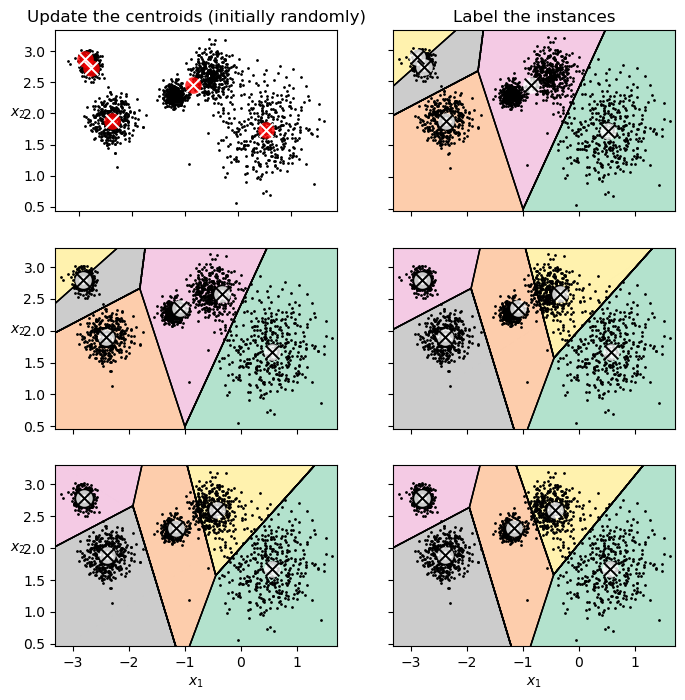

In [20]:
kmeans_iter1=KMeans(n_clusters=5,init="random",max_iter=1,random_state=42)
kmeans_iter2=KMeans(n_clusters=5,init="random",max_iter=2,random_state=42)
kmeans_iter3=KMeans(n_clusters=5,init="random",max_iter=3,random_state=42)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

plt.figure(figsize=(8, 8))
plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_,circle_color="r",cross_color="w")
plt.ylabel("$x_2$",rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)")

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1,X,show_xlabels=False,show_ylabels=False)
plt.title("Label the instances")

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1,X,show_centroids=False,show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2,X,show_xlabels=False,show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2,X,show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3,X,show_ylabels=False)

### K-Means Variability

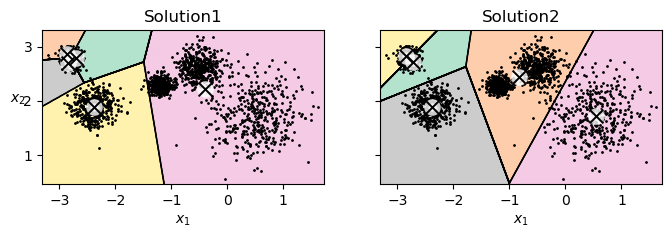

In [22]:
def plot_clusterer_comparision(cluster1,cluster2,X,title1=None,title2=None):
    cluster1.fit(X)
    cluster2.fit(X)

    plt.figure(figsize=(8,2))
    plt.subplot(121)
    plot_decision_boundaries(cluster1,X)
    if title1:
        plt.title(title1)

    plt.subplot(122)
    plot_decision_boundaries(cluster2,X,show_ylabels=False)
    if title2:
        plt.title(title2)

kmeans_rand_init1=KMeans(n_clusters=5,init="random",n_init=1,random_state=3)
kmeans_rand_init2=KMeans(n_clusters=5,init="random",n_init=1,random_state=11)

plot_clusterer_comparision(kmeans_rand_init1,kmeans_rand_init2,X,"Solution1","Solution2")
plt.show()

In [23]:
good_init=np.array([[0.5,1.7],[-0.5,2.6],[-2.4,1.9],[-2.8,2.8],[-1.2,2.3]])
kmeans=KMeans(n_clusters=5,init=good_init,n_init=1,random_state=42)
kmeans.fit(X)

KMeans(init=array([[ 0.5,  1.7],
       [-0.5,  2.6],
       [-2.4,  1.9],
       [-2.8,  2.8],
       [-1.2,  2.3]]),
       n_clusters=5, n_init=1, random_state=42)

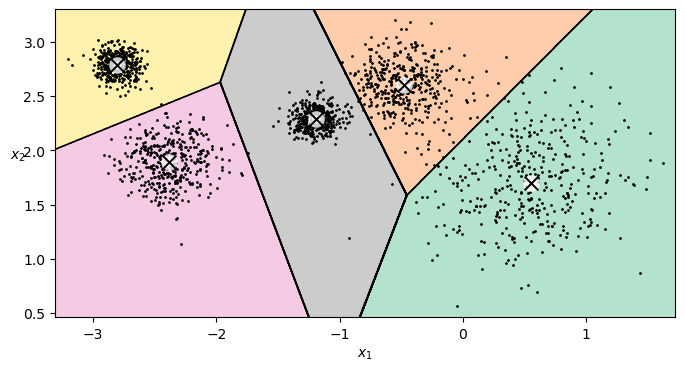

In [24]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

In [25]:
kmeans.inertia_

199.70913501878115

In [26]:
kmeans.score(X)

-199.70913501878118

In [27]:
kmeans_rand_init1.inertia_

959.0525104170717

In [28]:
kmeans_rand_init2.inertia_

321.11373330092147

In [29]:
X_dist=kmeans.transform(X)
len(X_dist)
X_dist

array([[1.55612371, 0.22656339, 1.83299452, 2.10775166, 0.58737638],
       [1.88100241, 0.8397475 , 1.20349586, 1.65109601, 0.05831677],
       [2.98750945, 2.11384854, 0.10289915, 1.06018877, 1.33204583],
       ...,
       [3.03105483, 2.16906097, 0.15677751, 1.08016525, 1.38705937],
       [3.36523209, 2.17754972, 0.86922004, 0.16778902, 1.52135395],
       [1.19785277, 0.30824242, 1.94767484, 2.37279665, 0.70964931]])

In [30]:
kmeans.labels_

array([1, 4, 2, ..., 2, 3, 1], dtype=int32)

In [31]:
X_dist[0,1]

0.22656338727888556

In [32]:
X_dist[1,4]

0.058316771208244925

In [33]:
X_dist[2,2]

0.1028991476244515

In [34]:
(X_dist[np.arange(len(X_dist)),kmeans.labels_]**2).sum()

199.70913501878098

### Multiple Initializations

In [36]:
kmeans_rnd_10inits=KMeans(n_clusters=5,init="random",n_init=10)
kmeans_rnd_10inits.fit(X)

KMeans(init='random', n_clusters=5, n_init=10)

In [37]:
kmeans_rnd_10inits.inertia_

199.70368563476893

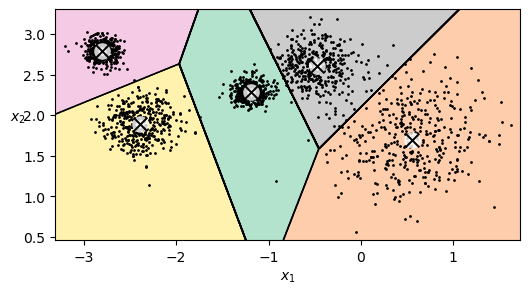

In [38]:
plt.figure(figsize=(6,3))
plot_decision_boundaries(kmeans_rnd_10inits,X)

### Centroid Initialization methods

In [40]:
kmeans_pp=KMeans(n_clusters=5,n_init=1,init="k-means++",random_state=42)
kmeans_pp.fit(X)
kmeans_pp.inertia_

199.71272048459093

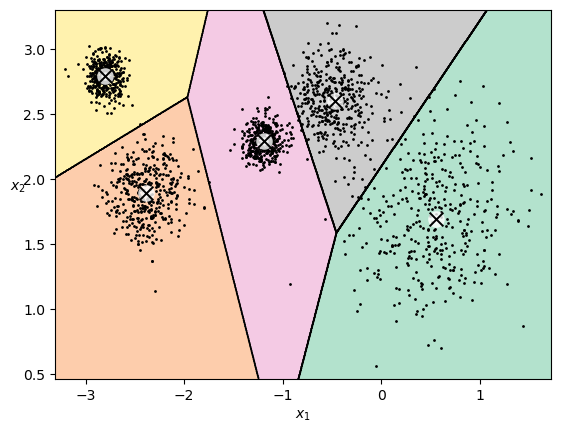

In [41]:
plot_decision_boundaries(kmeans_pp,X)

### Mini-Batch K-Means

In [43]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans=MiniBatchKMeans(n_clusters=5,n_init=3,random_state=42,verbose=1)
minibatch_kmeans.fit(X)

Init 1/3 with method k-means++
Inertia for init 1/3: 535.927416325942
Init 2/3 with method k-means++
Inertia for init 2/3: 410.2164185732371
Init 3/3 with method k-means++
Inertia for init 3/3: 324.4106782214924
Minibatch step 1/195: mean batch inertia: 0.15352488489704155
Minibatch step 2/195: mean batch inertia: 0.09699338709062806, ewa inertia: 0.09699338709062806
Minibatch step 3/195: mean batch inertia: 0.10463686826086974, ewa inertia: 0.10463686826086974
Minibatch step 4/195: mean batch inertia: 0.10996798519641082, ewa inertia: 0.10996798519641082
Minibatch step 5/195: mean batch inertia: 0.09542747319925658, ewa inertia: 0.09542747319925658
Minibatch step 6/195: mean batch inertia: 0.09900531184073519, ewa inertia: 0.09900531184073519
Minibatch step 7/195: mean batch inertia: 0.09281008826451559, ewa inertia: 0.09281008826451559
Minibatch step 8/195: mean batch inertia: 0.10211976215970726, ewa inertia: 0.10211976215970726
Minibatch step 9/195: mean batch inertia: 0.1045602953

MiniBatchKMeans(n_clusters=5, n_init=3, random_state=42, verbose=1)

In [44]:
minibatch_kmeans.inertia_

199.7959145795614

#### Using MiniBatchKMeans along with mmap

In [46]:
from sklearn.datasets import fetch_openml

mnist=fetch_openml('mnist_784',as_frame=False,parser="auto")

In [47]:
X_train,y_train=mnist.data[:60000],mnist.target[:60000]
X_test,y_test=mnist.data[60000:],mnist.target[60000:]


In [48]:
filename="my_mnist.mmap"
X_mmap=np.memmap(filename,dtype='float32',mode='write',shape=X_train.shape)
X_mmap[:]=X_train
X_mmap.flush()

In [49]:
minibatch_kmeans=MiniBatchKMeans(n_clusters=10,batch_size=10,n_init=3,random_state=42)
minibatch_kmeans.fit(X_mmap)


MiniBatchKMeans(batch_size=10, n_clusters=10, n_init=3, random_state=42)

100/100

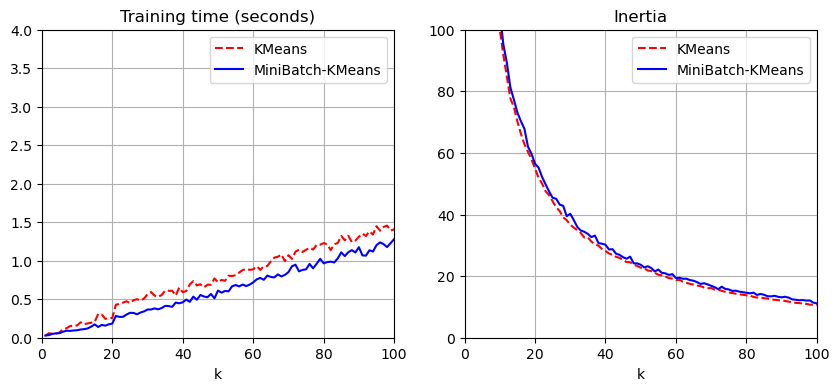

In [50]:
from timeit import timeit

max_k=100
times=np.empty((max_k,2))
inertias=np.empty((max_k,2))

for k in range(1,max_k+1):
    kmeans=KMeans(n_clusters=k,algorithm="lloyd",n_init=10,random_state=42)
    minibatches_kmeans=MiniBatchKMeans(n_clusters=k,n_init=10,random_state=42)
    print(f"\r{k}/{max_k}",end="")
    times[k-1,0]=timeit("kmeans.fit(X)",number=10,globals=globals())
    times[k-1,1]=timeit("minibatches_kmeans.fit(X)",number=10,globals=globals())

    inertias[k-1,0]=kmeans.inertia_
    inertias[k-1,1]=minibatches_kmeans.inertia_

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(range(1,max_k+1),times[:,0],"r--",label="KMeans")
plt.plot(range(1,max_k+1),times[:,1],"b-",label="MiniBatch-KMeans")
plt.title("Training time (seconds)")
plt.xlabel("k")
plt.axis([0,max_k,0,4])
plt.legend()
plt.grid()
plt.subplot(122)
plt.plot(range(1,max_k+1),inertias[:,0],"r--",label="KMeans")
plt.plot(range(1,max_k+1),inertias[:,1],"b-",label="MiniBatch-KMeans")
plt.title("Inertia")
plt.xlabel("k")
plt.axis([0,max_k,0,100])
plt.legend()
plt.grid()
plt.show()

#### Finding the Optimal number of clusters

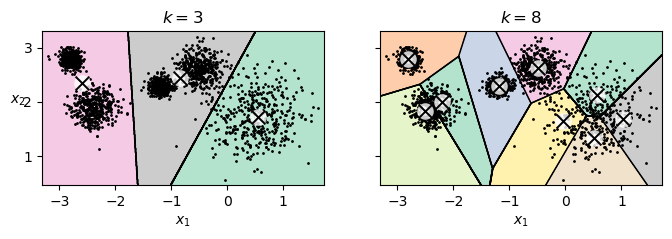

In [113]:
kmeans_k3=KMeans(n_clusters=3,n_init=10,random_state=42)
kmeans_k9=KMeans(n_clusters=9,n_init=10,random_state=42)

plot_clusterer_comparision(kmeans_k3,kmeans_k9,X,"$k=3$", "$k=8$")

In [115]:
kmeans_k3.inertia_

520.0283117696487

In [117]:
kmeans_k9.inertia_

110.58059586048888

(1.0, 8.5, 0.0, 1300.0)

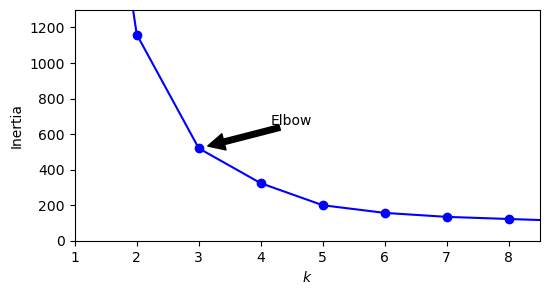

In [146]:

kmeans_per_k=[KMeans(n_clusters=k,n_init=10,random_state=42).fit(X)
             for k in range(1,10)]
inertias=[model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(6,3))
plt.plot(range(1,10),inertias,"bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(3, inertias[2]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])



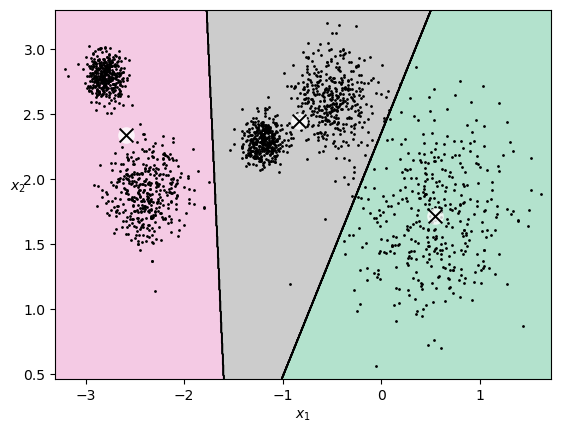

In [138]:
plot_decision_boundaries(kmeans_per_k[3 - 1], X)
plt.show()

In [164]:
from sklearn.metrics import silhouette_score
silhouette_score(X,kmeans.labels_)

0.33051816474209456

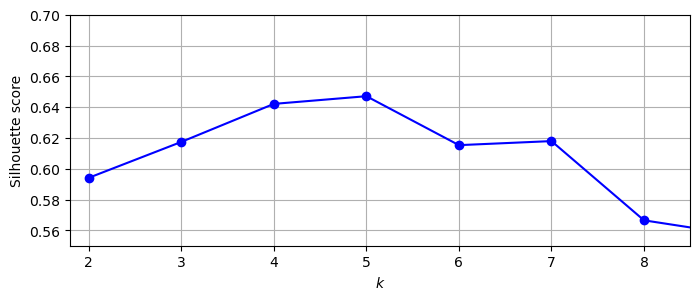

In [152]:

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()

plt.show()

## Using Clustering for image segmentation

In [169]:

import urllib.request
from pathlib import Path

IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"
filepath = IMAGES_PATH / filename
if not filepath.is_file():
    print("Downloading", filename)
    url = f"{homl3_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url, filepath)

In [172]:
import PIL

image=np.asarray(PIL.Image.open(filepath))
image.shape

(533, 800, 3)

In [196]:
X=image.reshape(-1,3)

X.shape

(426400, 3)

In [198]:
kmeans=KMeans(n_clusters=8,n_init=10,random_state=42).fit(X)

kmeans.cluster_centers_

array([[  5.6105612 ,  27.61743918,   1.44857047],
       [250.68280046, 237.8319458 ,   6.51237711],
       [ 54.37997208,  97.09151272,  14.07131629],
       [155.1122467 , 160.29920705,  98.37997063],
       [ 93.53208815, 132.47927103,  39.06947451],
       [ 24.39502109,  63.41611633,   4.09118396],
       [195.12454743,  50.81607531,  11.20057929],
       [223.40683449, 182.94424185,   9.39848253]])

In [200]:
kmeans.labels_

array([0, 0, 0, ..., 5, 5, 0], dtype=int32)